In [ ]:
## Notebook env: mirtud_env (R kernel)

In [1]:
library(ggplot2)
library(tidyr)
library(dplyr)
library(stringr)

## parameter sets:
## *T* 'R10000_K1_C1_T1', 'R10000_K1_C1_T1e-05', 'R10000_K1_C1_T1e-10', 'R10000_K1_C1_T1e-15', 'R10000_K1_C1_T1e05', 'R10000_K1_C1_T1e10', 'R10000_K1_C1_T1e15', 
## *C* and *K* 'R10000_K1_C1e-05_T1', 'R10000_K1_C1e05_T1', 'R10000_K1e-05_C1_T1', 'R10000_K1e05_C1_T1',
## *R* and *T* 'R1_K1_C1_T1', 'R1_K1_C1_T1e-05', 'R1_K1_C1_T1e-10', 'R1_K1_C1_T1e-15', 'R1_K1_C1_T1e05', 'R1_K1_C1_T1e10', 'R1_K1_C1_T1e15'


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
## load in latent variable results to caluclate silhouette scores on
path = '/home/ssobti/projects/mir_tud/output_data/mave_output/mave_trblsht/tRF/parameter_optimization'
ltv_list = list.dirs(path, full.names = F, recursive = F) %>% 
  lapply(function(x) {read.csv(file.path(path, x, paste0(x, '_batch_4thru6_ltv10_scMAVE_mu-matrix.tsv.gz')), sep = '\t', row.names = 1)})

names(ltv_list) = list.dirs(path, full.names = F, recursive = F)

In [3]:
names(ltv_list)

[1] "R1_K1_C1_T1"                    "R1_K1_C1_T100000"              
 [3] "R1_K1_C1_T10000000000"          "R1_K1_C1_T1000000000000000"    
 [5] "R1_K1_C1_T1e-05"                "R1_K1_C1_T1e-10"               
 [7] "R1_K1_C1_T1e-15"                "R10000_K1_C1_T1"               
 [9] "R10000_K1_C1_T100000"           "R10000_K1_C1_T10000000000"     
[11] "R10000_K1_C1_T1000000000000000" "R10000_K1_C1_T1e-05"           
[13] "R10000_K1_C1_T1e-10"            "R10000_K1_C1_T1e-15"           
[15] "R10000_K1_C100000_T1"           "R10000_K1_C1e-05_T1"           
[17] "R10000_K100000_C1_T1"           "R10000_K1e-05_C1_T1"

In [4]:
ltv_list = ltv_list[c('R10000_K1_C1_T1', 'R10000_K1_C1_T1e-05', 'R10000_K1_C1_T1e-10', 'R10000_K1_C1_T1e-15', 'R10000_K1_C1_T100000', 
'R10000_K1_C1_T10000000000', 'R10000_K1_C1_T1000000000000000', 'R10000_K1_C1e-05_T1', 'R10000_K1_C100000_T1', 'R10000_K1e-05_C1_T1', 'R10000_K100000_C1_T1',
'R1_K1_C1_T1', 'R1_K1_C1_T1e-05', 'R1_K1_C1_T1e-10', 'R1_K1_C1_T1e-15', 'R1_K1_C1_T100000', 'R1_K1_C1_T10000000000', 'R1_K1_C1_T1000000000000000')]

In [ ]:
## caluclate silhouette scores on each mave run in ltv_list


In [5]:
## show umap of mave runs
umap_list = list.dirs(path, full.names = F, recursive = F) %>% 
  lapply(function(x) {read.csv(file.path(path, x, paste0(x, '_batch_4thru6_ltv10_UMAP-OF-MU.tsv.gz')), sep = '\t', row.names = 1)})

names(umap_list) = list.dirs(path, full.names = F, recursive = F)

In [6]:
umap_list = umap_list[c('R10000_K1_C1_T1', 'R10000_K1_C1_T1e-05', 'R10000_K1_C1_T1e-10', 'R10000_K1_C1_T1e-15', 'R10000_K1_C1_T100000', 
'R10000_K1_C1_T10000000000', 'R10000_K1_C1_T1000000000000000', 'R10000_K1_C1e-05_T1', 'R10000_K1_C100000_T1', 'R10000_K1e-05_C1_T1', 'R10000_K100000_C1_T1',
'R1_K1_C1_T1', 'R1_K1_C1_T1e-05', 'R1_K1_C1_T1e-10', 'R1_K1_C1_T1e-15', 'R1_K1_C1_T100000', 'R1_K1_C1_T10000000000', 'R1_K1_C1_T1000000000000000')]

In [7]:
head(umap_list[[1]])

UMAP1    UMAP2    guide              
tRF_2:ACTATGGGTGACGTCC-1 8.359989 3.718367 tRF_Ala_TGC.AGC_6  
tRF_3:GACTCAAAGAACTCCT-1 7.299416 7.281337 tRF_Val_CAC_2      
tRF_3:AGTCAACTCTCTGAGA-1 5.946145 7.480753 tRF_Val_CAC.AAC_6  
tRF_1:TTTGATCGTGCCTGAC-1 8.923274 3.909265 tRF_Thr_TGT_3      
tRF_3:CTCCTTTGTGGGCTCT-1 5.188314 5.251936 tRNA-Arg-TCG-1-1.2t
tRF_2:TTGGTTTCACGAAGAC-1 3.498930 3.010405 tRF_Val_CAC_2

In [8]:
UMAP_output = umap_list

In [9]:
UMAP_output_2dims = list()
for (j in 1:length(UMAP_output)){
    guides = unique(UMAP_output[[j]]$guide)
    tmp_df = as.data.frame(matrix(0, nrow = nrow(UMAP_output[[j]]), ncol = length(guides)))
    colnames(tmp_df) = guides
    for (i in 1:length(guides)){
        guide_cells = UMAP_output[[j]]$guide == guides[i]
        vec = UMAP_output[[j]]$guide
        vec[guide_cells] = 'Guide'
        vec[!guide_cells] = 'N/A'
        tmp_df[,i] <- vec
    }
    UMAP_output_2dims[[j]] = cbind(UMAP_output[[j]], tmp_df)
}


In [10]:
head(UMAP_output_2dims[[1]])

UMAP1    UMAP2    guide              
tRF_2:ACTATGGGTGACGTCC-1 8.359989 3.718367 tRF_Ala_TGC.AGC_6  
tRF_3:GACTCAAAGAACTCCT-1 7.299416 7.281337 tRF_Val_CAC_2      
tRF_3:AGTCAACTCTCTGAGA-1 5.946145 7.480753 tRF_Val_CAC.AAC_6  
tRF_1:TTTGATCGTGCCTGAC-1 8.923274 3.909265 tRF_Thr_TGT_3      
tRF_3:CTCCTTTGTGGGCTCT-1 5.188314 5.251936 tRNA-Arg-TCG-1-1.2t
tRF_2:TTGGTTTCACGAAGAC-1 3.498930 3.010405 tRF_Val_CAC_2      
                         tRF_Ala_TGC.AGC_6 tRF_Val_CAC_2 tRF_Val_CAC.AAC_6
tRF_2:ACTATGGGTGACGTCC-1 Guide             N/A           N/A              
tRF_3:GACTCAAAGAACTCCT-1 N/A               Guide         N/A              
tRF_3:AGTCAACTCTCTGAGA-1 N/A               N/A           Guide            
tRF_1:TTTGATCGTGCCTGAC-1 N/A               N/A           N/A              
tRF_3:CTCCTTTGTGGGCTCT-1 N/A               N/A           N/A              
tRF_2:TTGGTTTCACGAAGAC-1 N/A               Guide         N/A              
                         tRF_Thr_TGT_3 tRNA-Arg-TCG-1-1.2t tRF_Ser_TGA_2
tRF_2:ACTATGGGTGACGTCC-1 N/A           N/A                 N/A          
tRF_3:GACTCAAAGAACTCCT-1 N/A           N/A                 N/A          
tRF_3:AGTCAACTCTCTGAGA-1 N/A           N/A                 N/A          
tRF_1:TTTGATCGTGCCTGAC-1 Guide         N/A                 N/A          
tRF_3:CTCCTTTGTGGGCTCT-1 N/A           Guide               N/A          
tRF_2:TTGGTTTCACGAAGAC-1 N/A           N/A                 N/A          
                         tRF_Gln_CTG.TTG_2 ⋯ tRNA-Ala-AGC-(2)2-1.rh
tRF_2:ACTATGGGTGACGTCC-1 N/A               ⋯ N/A                   
tRF_3:GACTCAAAGAACTCCT-1 N/A               ⋯ N/A                   
tRF_3:AGTCAACTCTCTGAGA-1 N/A               ⋯ N/A                   
tRF_1:TTTGATCGTGCCTGAC-1 N/A               ⋯ N/A                   
tRF_3:CTCCTTTGTGGGCTCT-1 N/A               ⋯ N/A                   
tRF_2:TTGGTTTCACGAAGAC-1 N/A               ⋯ N/A                   
                         tRNA-Ile-AAT-(5)5-1.2t tRNA-Lys-CTT-11-1.2t
tRF_2:ACTATGGGTGACGTCC-1 N/A                    N/A                 
tRF_3:GACTCAAAGAACTCCT-1 N/A                    N/A                 
tRF_3:AGTCAACTCTCTGAGA-1 N/A                    N/A                 
tRF_1:TTTGATCGTGCCTGAC-1 N/A                    N/A                 
tRF_3:CTCCTTTGTGGGCTCT-1 N/A                    N/A                 
tRF_2:TTGGTTTCACGAAGAC-1 N/A                    N/A                 
                         tRNA-Met-CAT-1-1.2t tRNA-Pro-TGG-(5)3-1.2t
tRF_2:ACTATGGGTGACGTCC-1 N/A                 N/A                   
tRF_3:GACTCAAAGAACTCCT-1 N/A                 N/A                   
tRF_3:AGTCAACTCTCTGAGA-1 N/A                 N/A                   
tRF_1:TTTGATCGTGCCTGAC-1 N/A                 N/A                   
tRF_3:CTCCTTTGTGGGCTCT-1 N/A                 N/A                   
tRF_2:TTGGTTTCACGAAGAC-1 N/A                 N/A                   
                         tRNA-Arg-CCT-4-1.3t tRF_Gln_TTG.CTG_2
tRF_2:ACTATGGGTGACGTCC-1 N/A                 N/A              
tRF_3:GACTCAAAGAACTCCT-1 N/A                 N/A              
tRF_3:AGTCAACTCTCTGAGA-1 N/A                 N/A              
tRF_1:TTTGATCGTGCCTGAC-1 N/A                 N/A              
tRF_3:CTCCTTTGTGGGCTCT-1 N/A                 N/A              
tRF_2:TTGGTTTCACGAAGAC-1 N/A                 N/A              
                         tRNA-Val-AAC-3-1.rh tRNA-Ala-AGC-4-1.2t
tRF_2:ACTATGGGTGACGTCC-1 N/A                 N/A                
tRF_3:GACTCAAAGAACTCCT-1 N/A                 N/A                
tRF_3:AGTCAACTCTCTGAGA-1 N/A                 N/A                
tRF_1:TTTGATCGTGCCTGAC-1 N/A                 N/A                
tRF_3:CTCCTTTGTGGGCTCT-1 N/A                 N/A                
tRF_2:TTGGTTTCACGAAGAC-1 N/A                 N/A                
                         tRF_Arg_CCG.CCT_3
tRF_2:ACTATGGGTGACGTCC-1 N/A              
tRF_3:GACTCAAAGAACTCCT-1 N/A              
tRF_3:AGTCAACTCTCTGAGA-1 N/A              
tRF_1:TTTGATCGTGCCTGAC-1 N/A              
tR

In [11]:
plts2 <- list()
for (j in 1:length(UMAP_output_2dims)){
    plts2[[j]] <- list()
    for (i in 1:length(guides)){
        tmp <- UMAP_output_2dims[[j]][,c(1,2,(i+3))]
        colnames(tmp)[3] <- 'Type'
        tmp <- tmp[order(tmp$Type, decreasing = TRUE),]
        if (str_sub(guides[i], start = 1, end = 6) == 'TuD_NC'){
            plts2[[j]][[i]] <- ggplot(tmp, aes(UMAP1, UMAP2, color = Type)) + geom_point(size = 0.5) + 
            theme_classic() + scale_color_manual(values = c('#39568CFF', 'gray95')) + theme(legend.position = 'none', plot.title = element_text(hjust = 0.5)) +
            ggtitle(guides[i]) + xlab('UMAP1') + ylab('UMAP2')
        } else {
            plts2[[j]][[i]] <- ggplot(tmp, aes(UMAP1, UMAP2, color = Type)) + geom_point(size = 0.5) + 
            theme_classic() + scale_color_manual(values = c('red', 'gray95')) + theme(legend.position = 'none', plot.title = element_text(hjust = 0.5)) +
            ggtitle(guides[i]) + xlab('UMAP1') + ylab('UMAP2')
        }
    }
}

In [12]:
library(ggpubr)
umap_plts <- list()
for (j in 1:length(plts2)){
    umap_plts[[j]] <- rep(list('empty'), ceiling(length(plts2[[j]])/25))
    for (i in 1:ceiling(length(plts2[[j]])/25)){
        umap_plts[[j]][[i]] <- ggarrange(plotlist = plts2[[j]][(25*(i-1)+1):(25*i)], ncol = 5, nrow = 5, legend = 'none')
    }
}


[1] "R10000_K1_C1_T1"

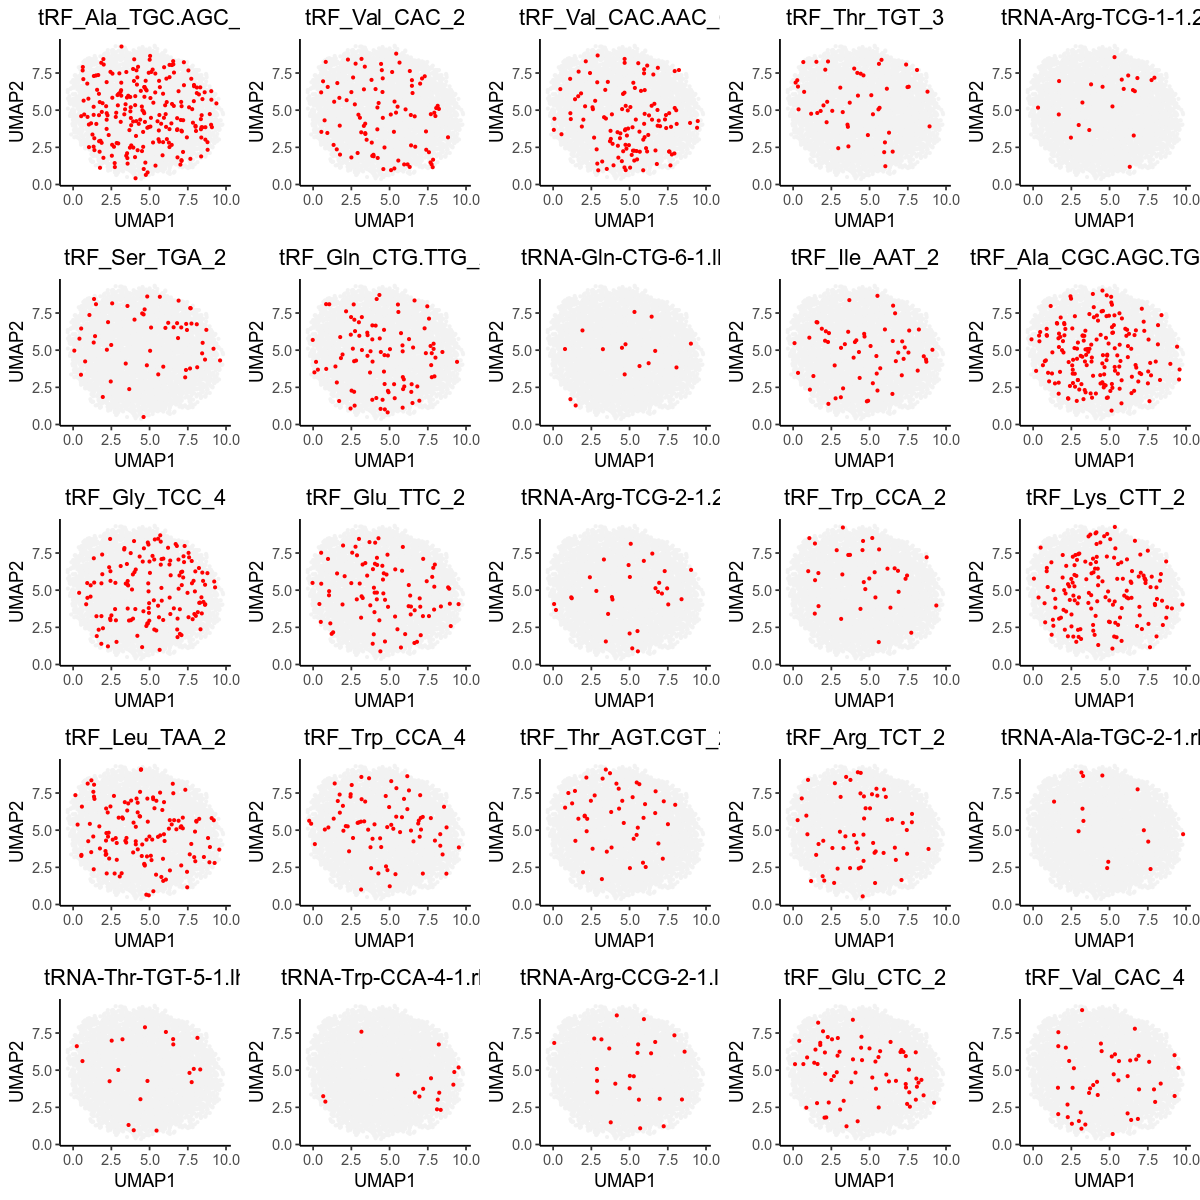

In [13]:
options(repr.plot.width=10, repr.plot.height=10)
names(umap_list)[[1]]
umap_plts[[1]][[1]]

[1] "R10000_K1_C1_T1e-05"

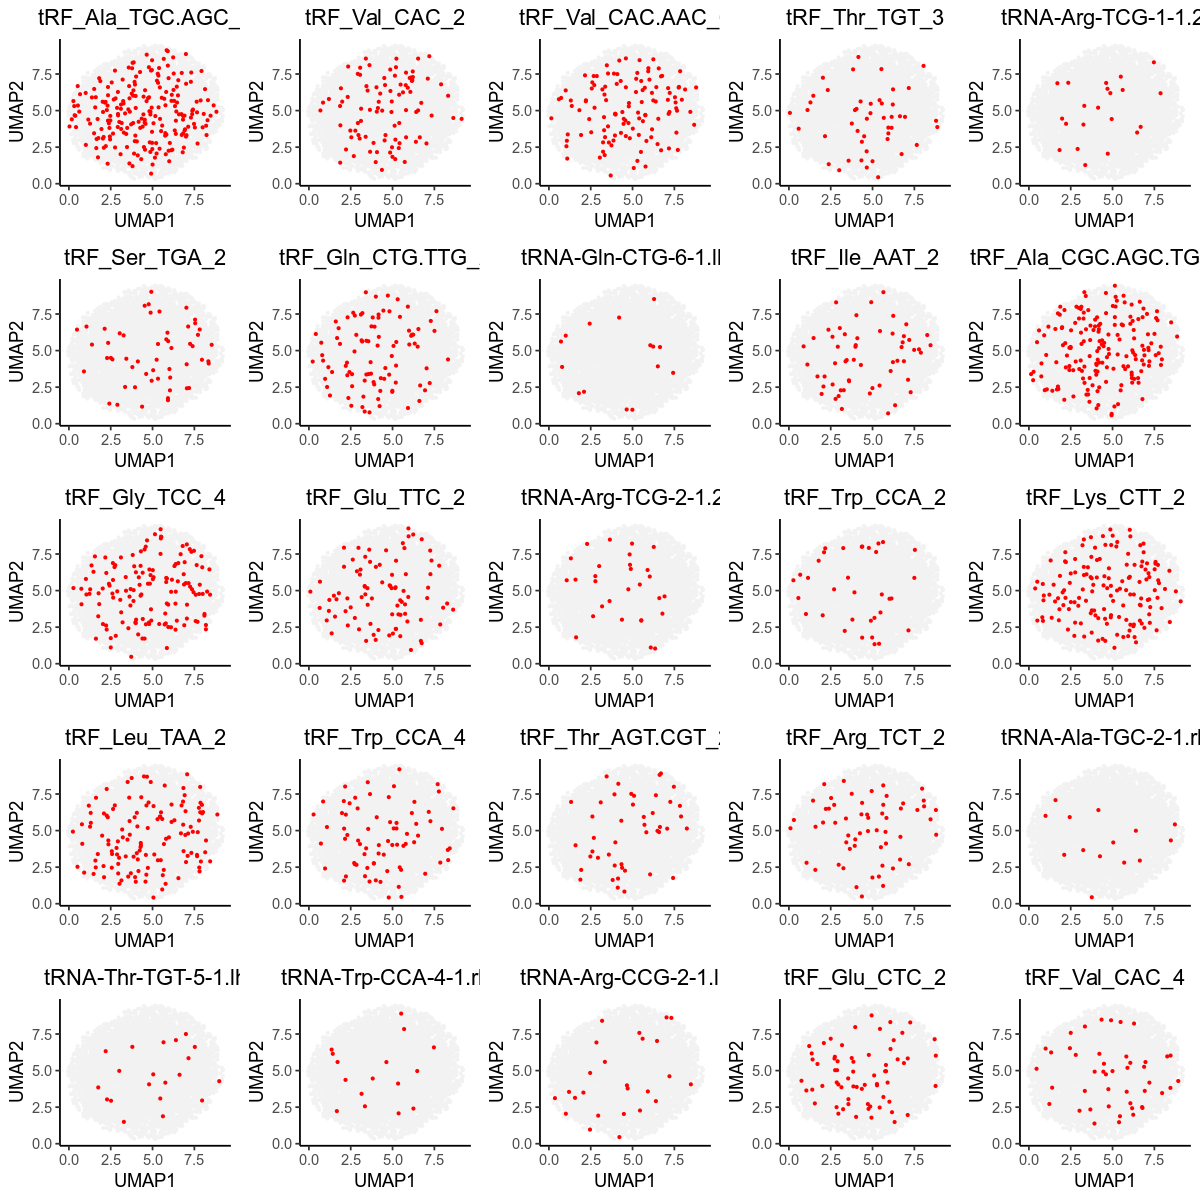

In [14]:
names(umap_list)[[2]]
umap_plts[[2]][[1]]

[1] "R10000_K1_C1_T1e-10"

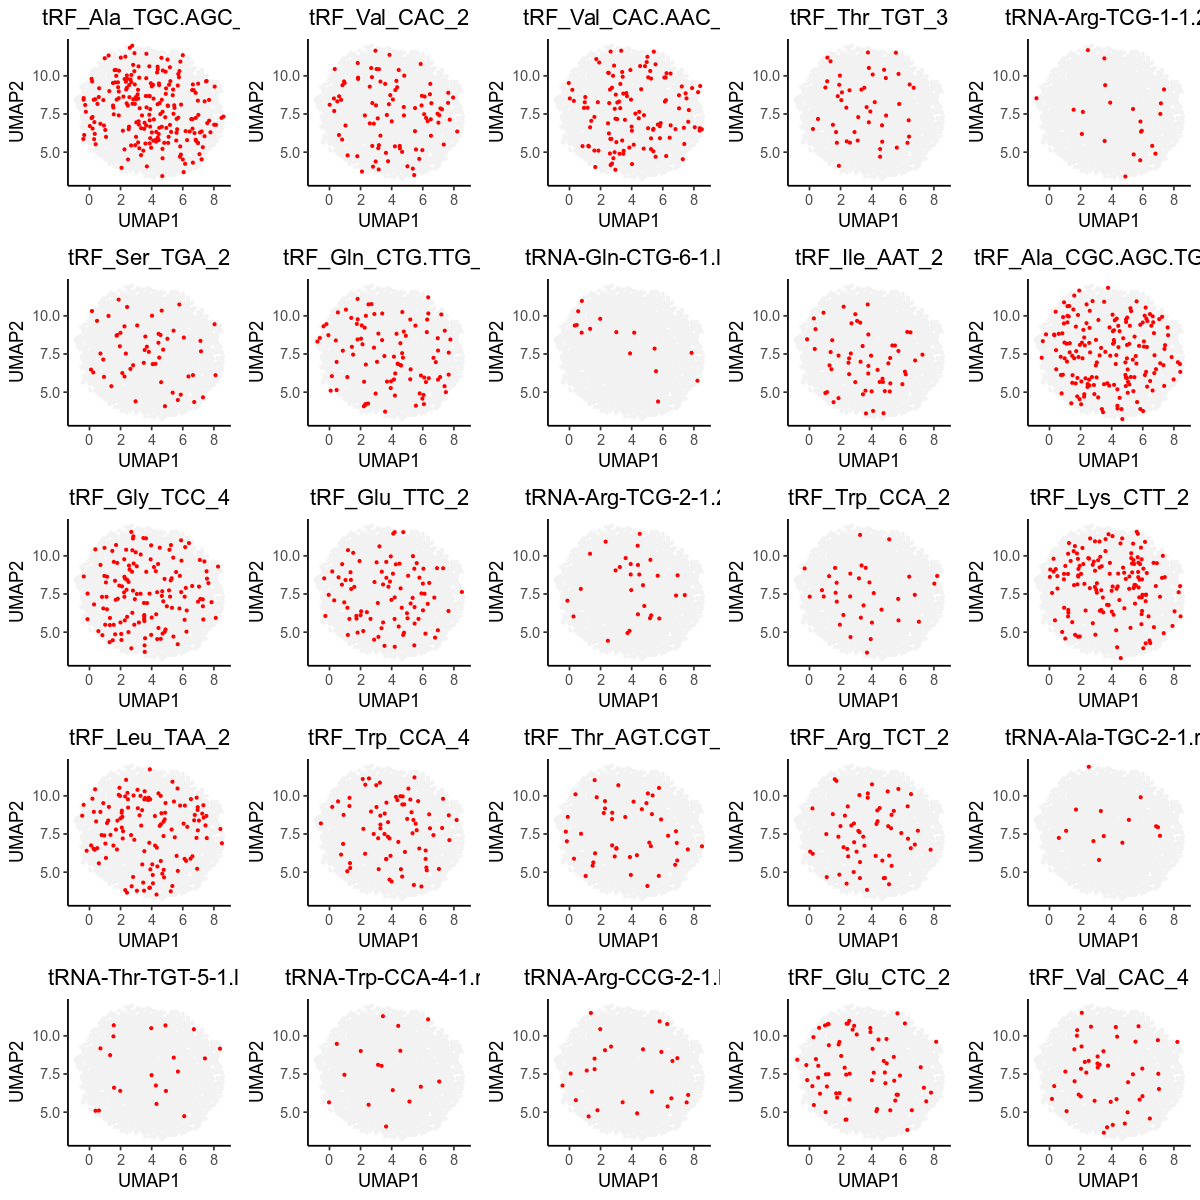

In [15]:
names(umap_list)[[3]]
umap_plts[[3]][[1]]

[1] "R10000_K1_C1_T1e-15"

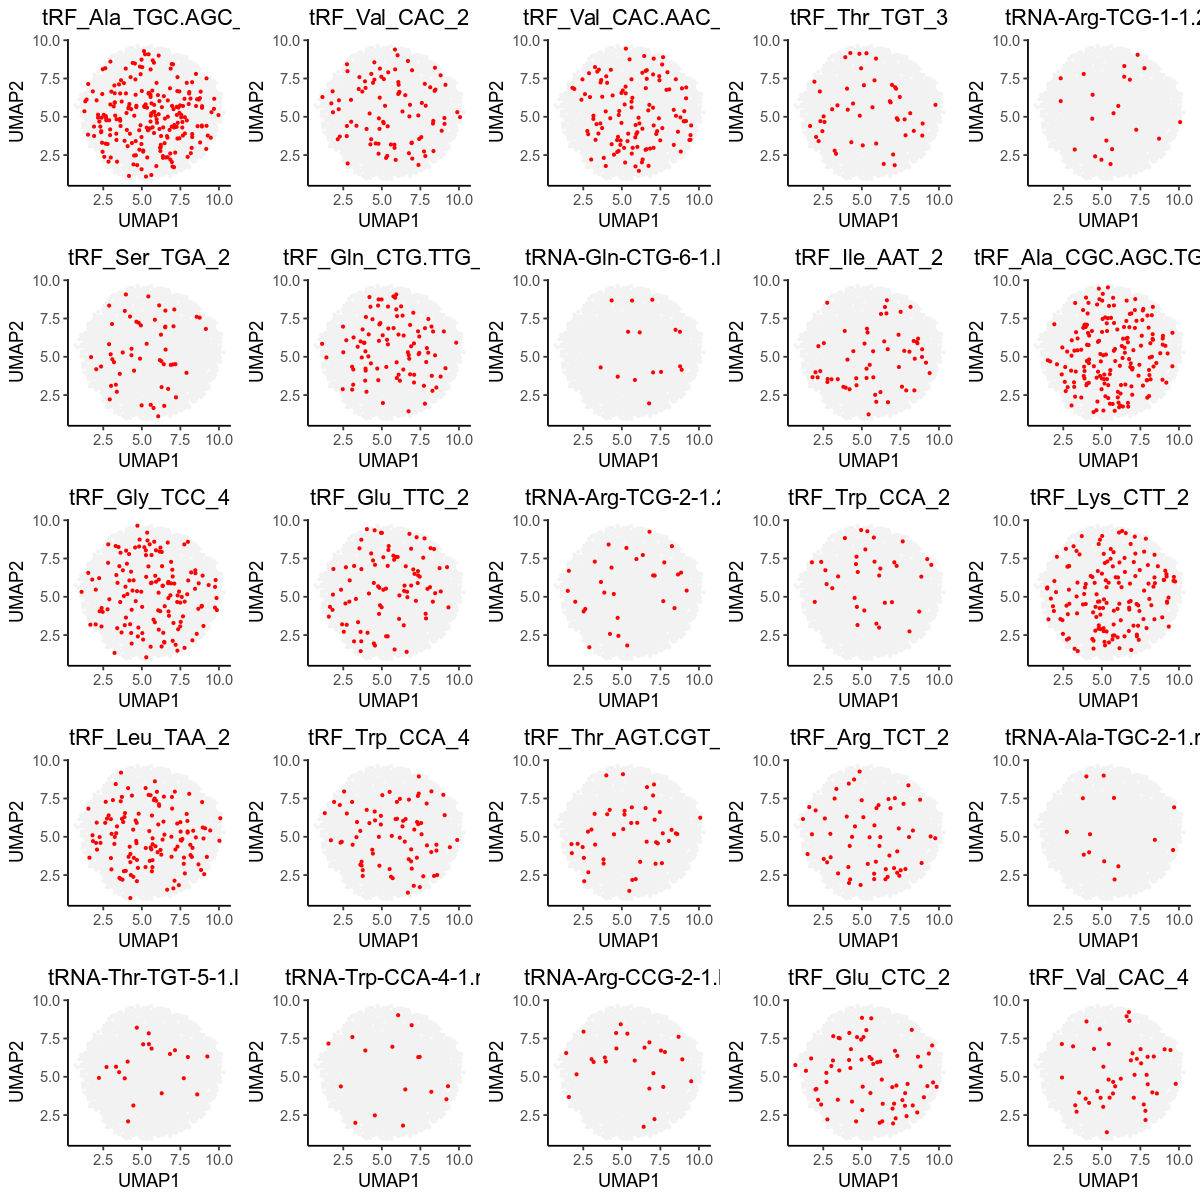

In [16]:
names(umap_list)[[4]]
umap_plts[[4]][[1]]

[1] "R10000_K1_C1_T100000"

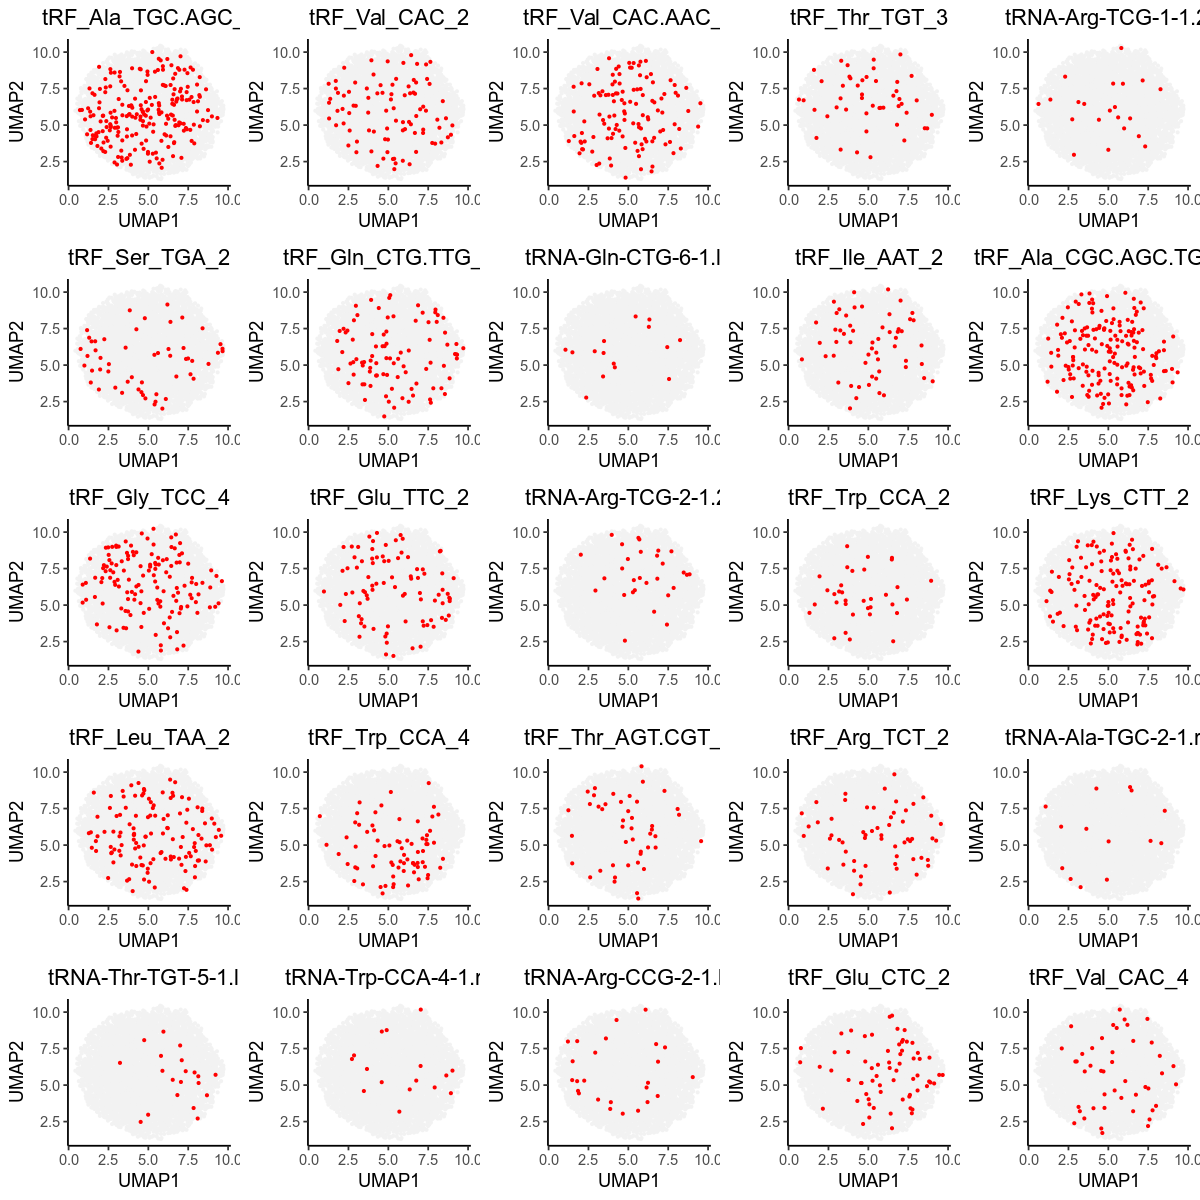

In [17]:
names(umap_list)[[5]]
umap_plts[[5]][[1]]

[1] "R10000_K1_C1_T10000000000"

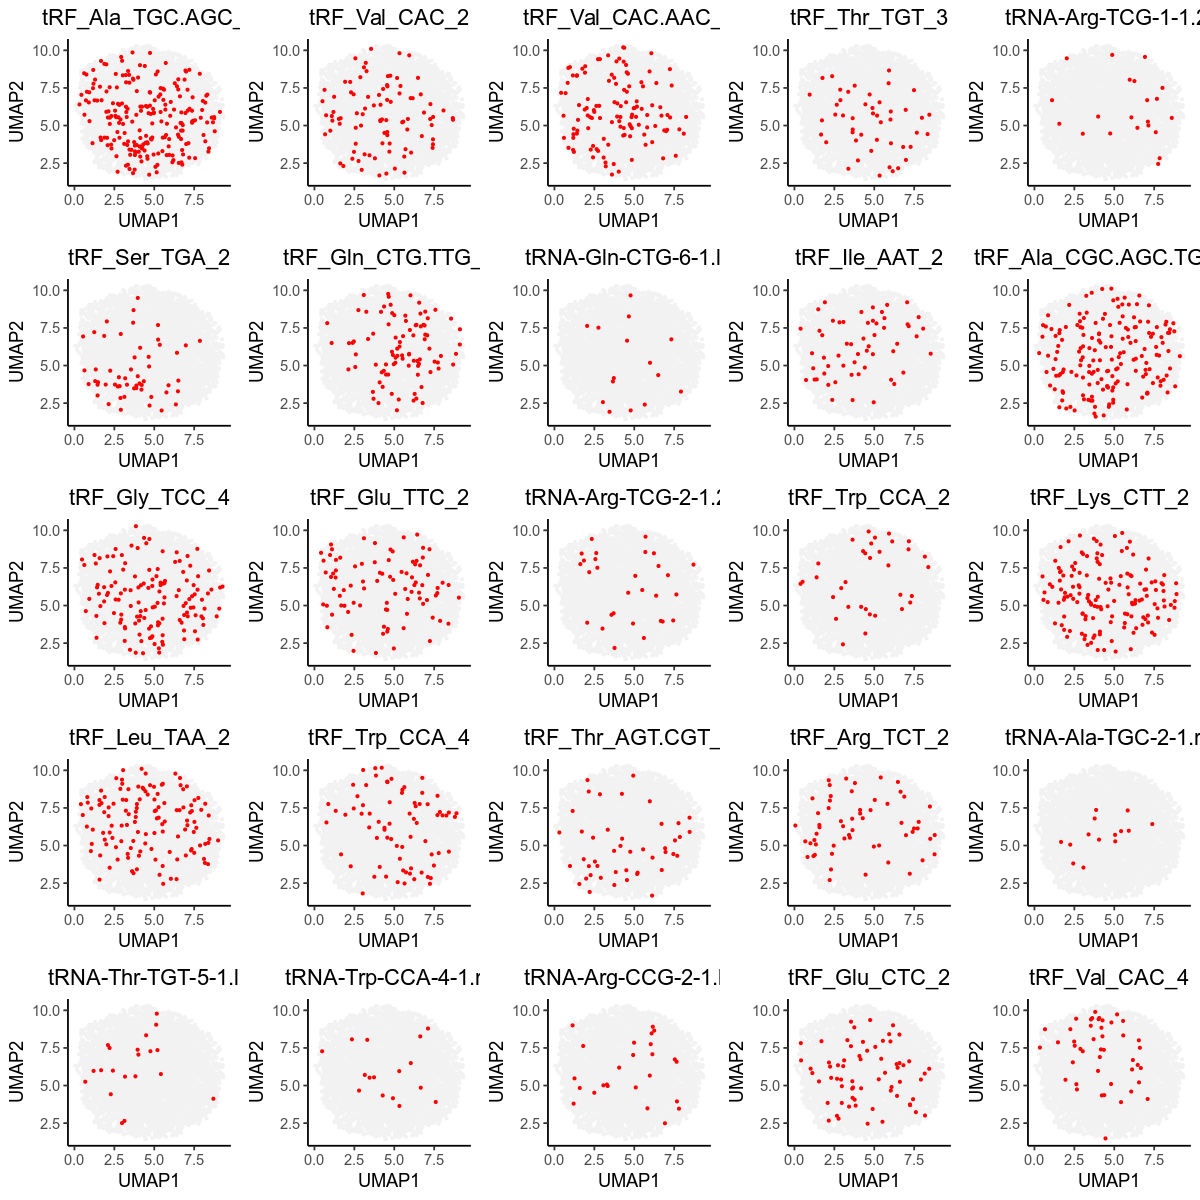

In [18]:
names(umap_list)[[6]]
umap_plts[[6]][[1]]

[1] "R10000_K1_C1_T1000000000000000"

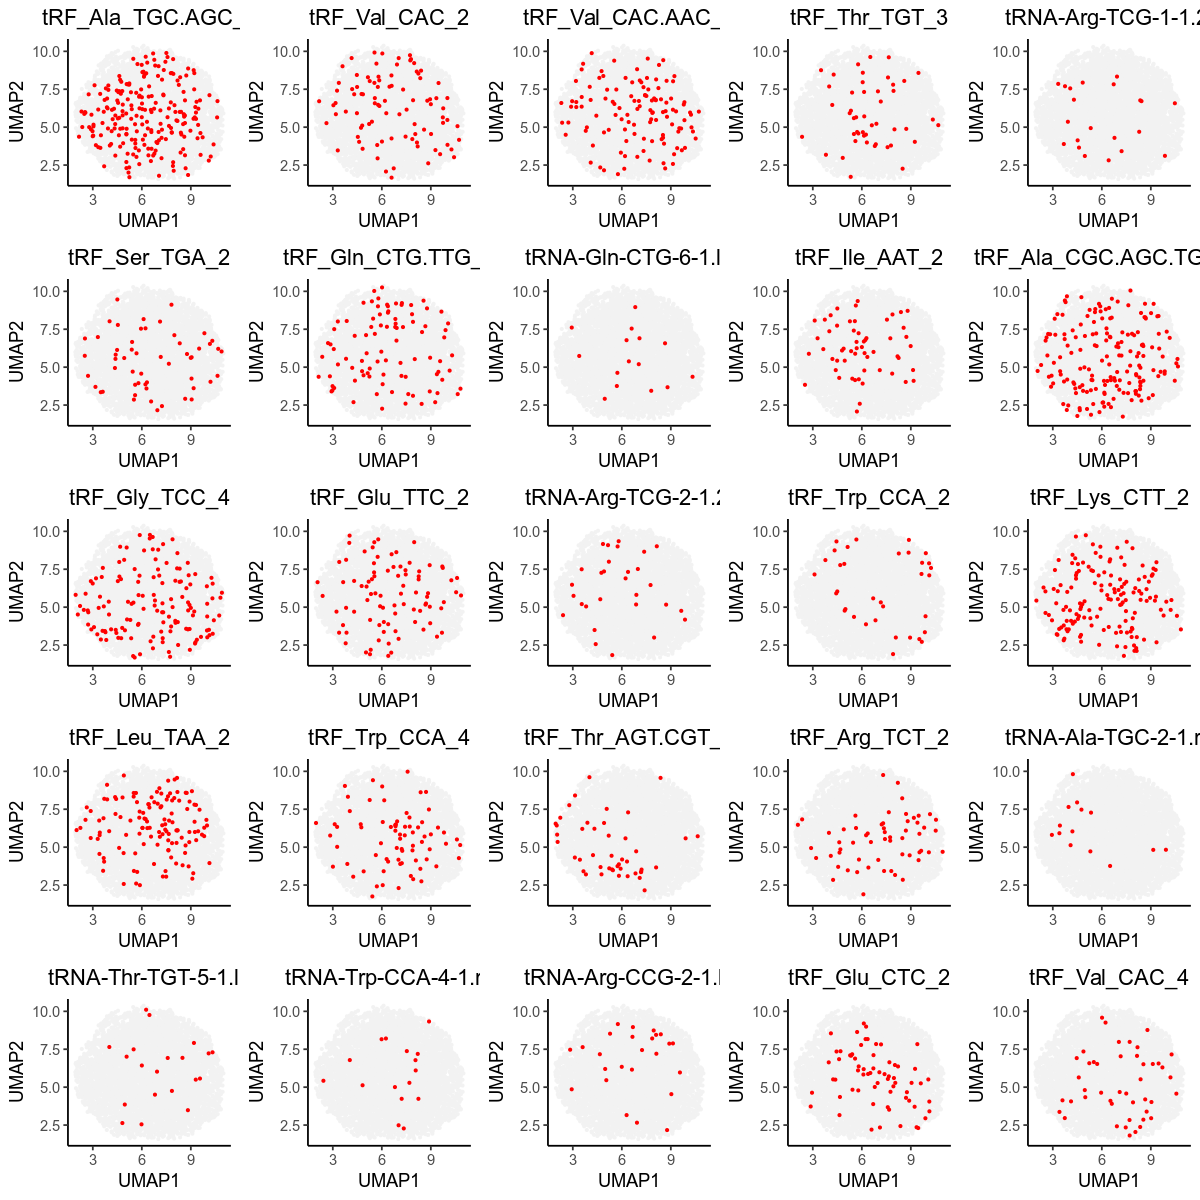

In [19]:
names(umap_list)[[7]]
umap_plts[[7]][[1]]

[1] "R10000_K1_C1e-05_T1"

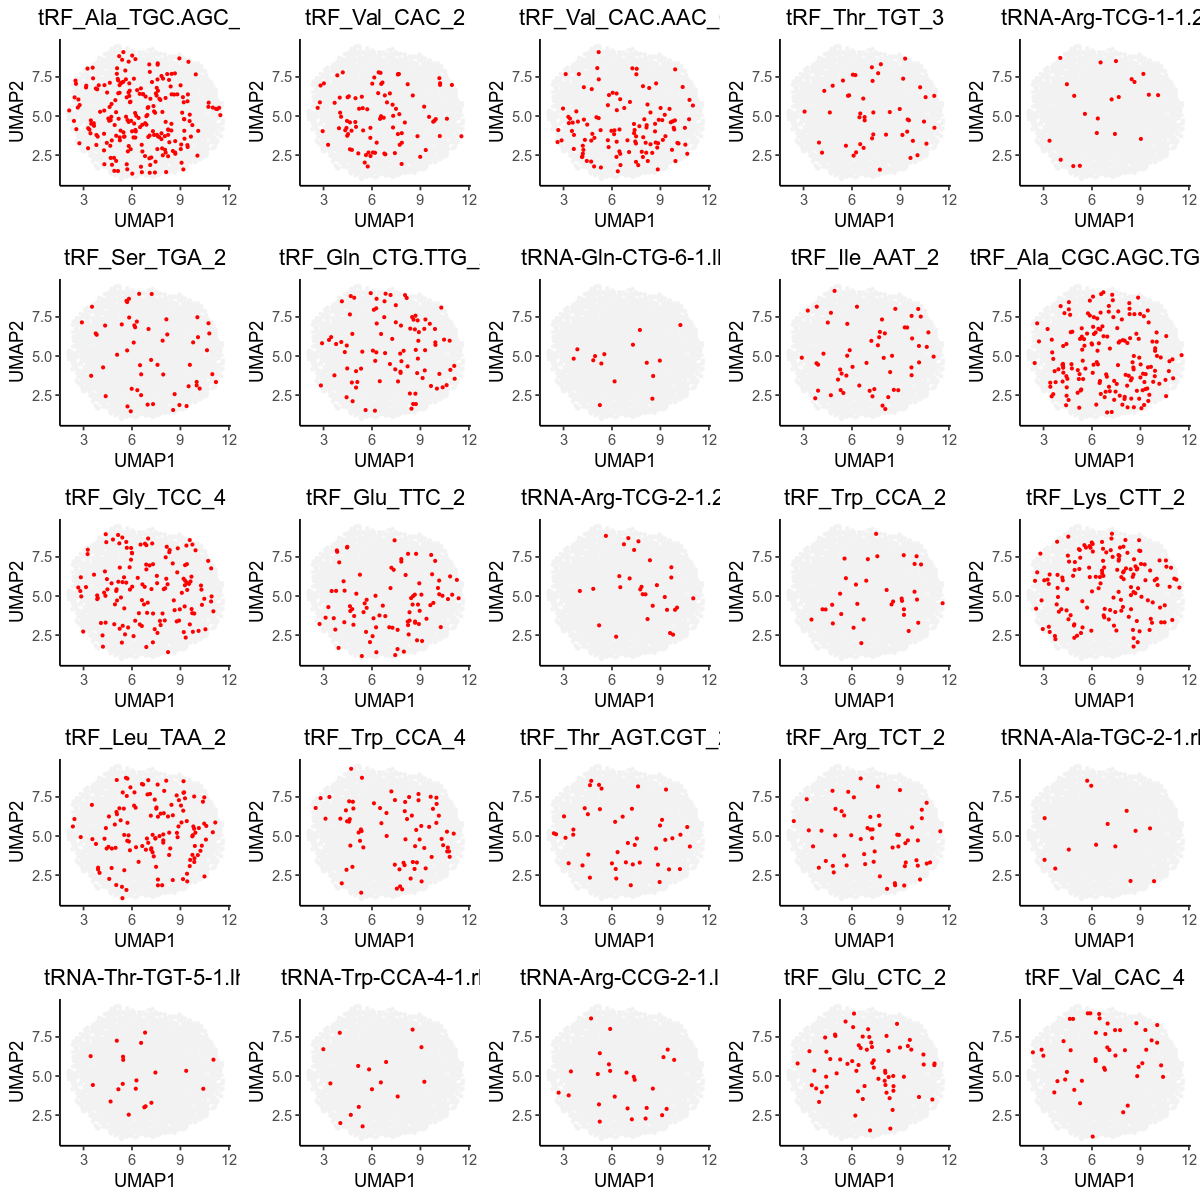

In [20]:
names(umap_list)[[8]]
umap_plts[[8]][[1]]

[1] "R10000_K1_C100000_T1"

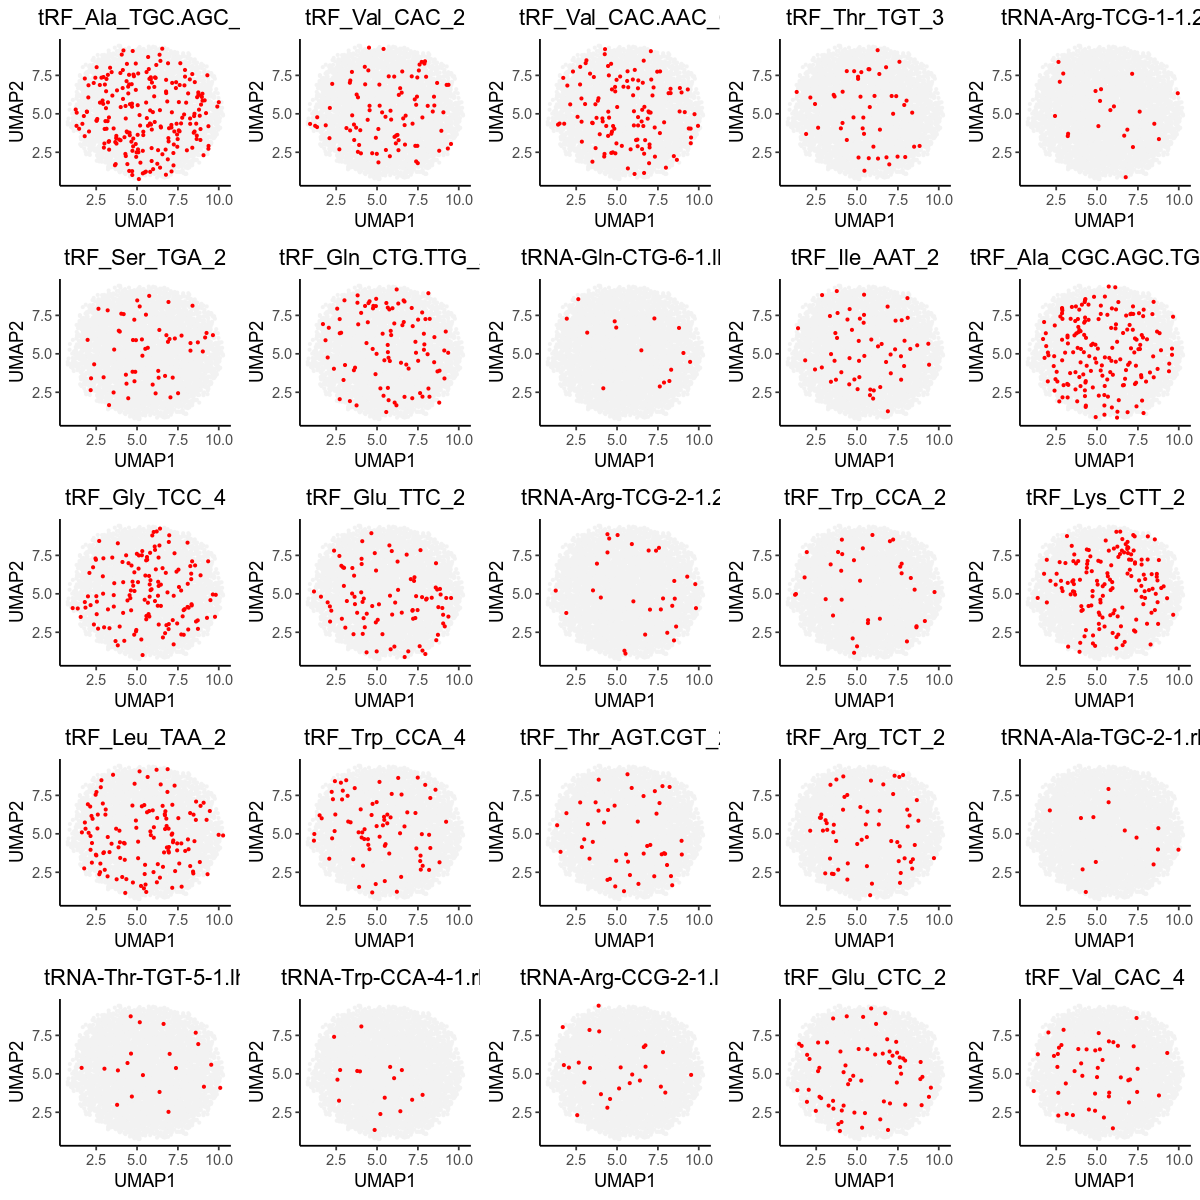

In [21]:
names(umap_list)[[9]]
umap_plts[[9]][[1]]

[1] "R10000_K1e-05_C1_T1"

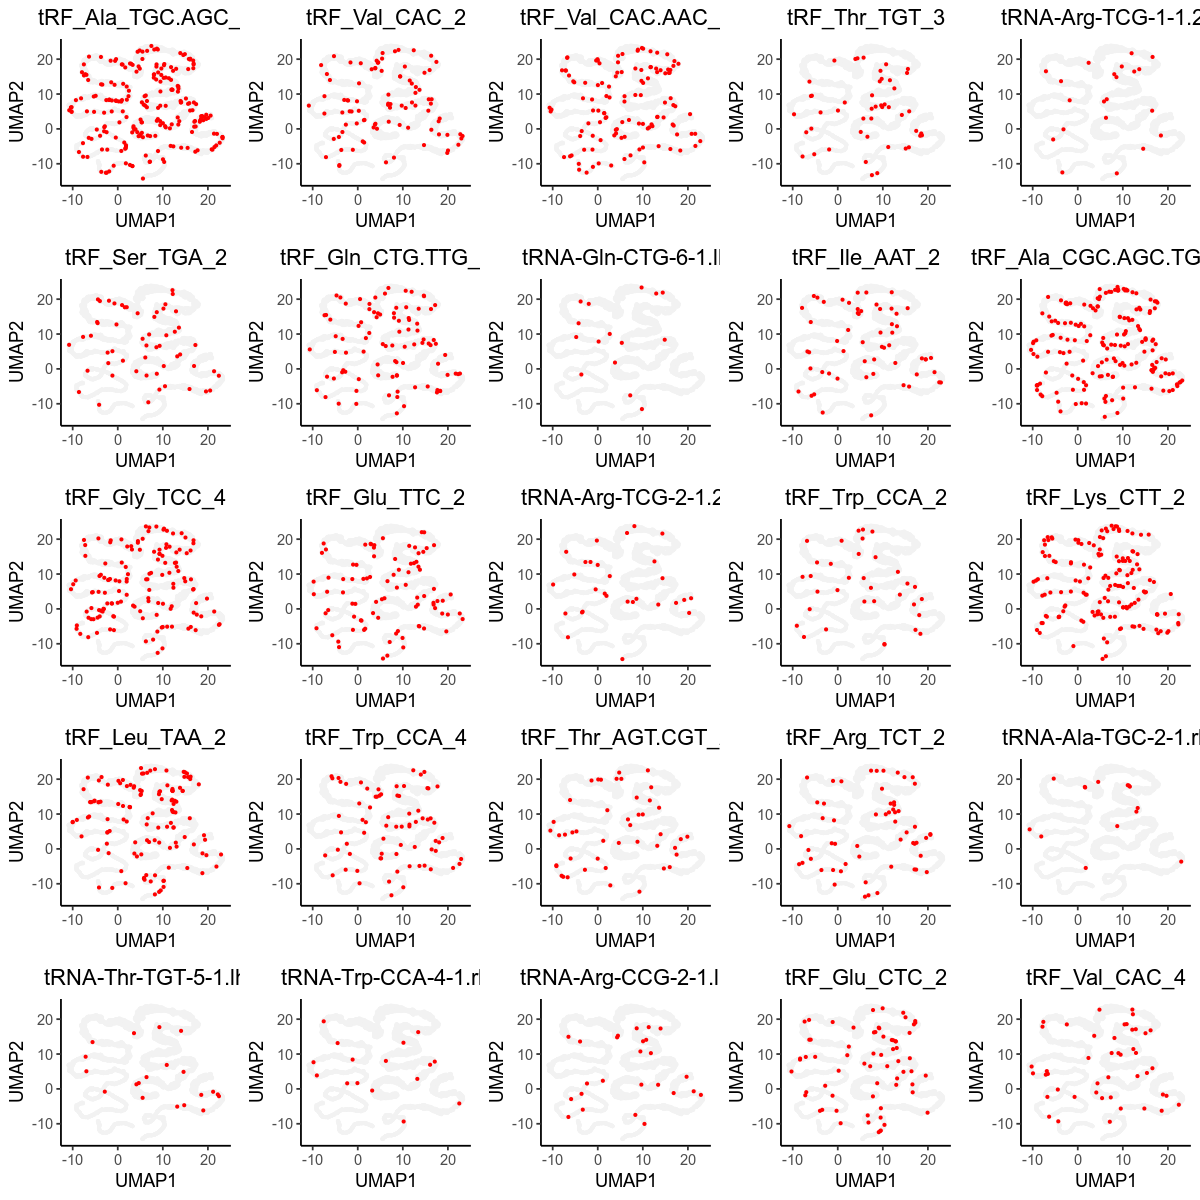

In [22]:
names(umap_list)[[10]]
umap_plts[[10]][[1]]

[1] "R10000_K100000_C1_T1"

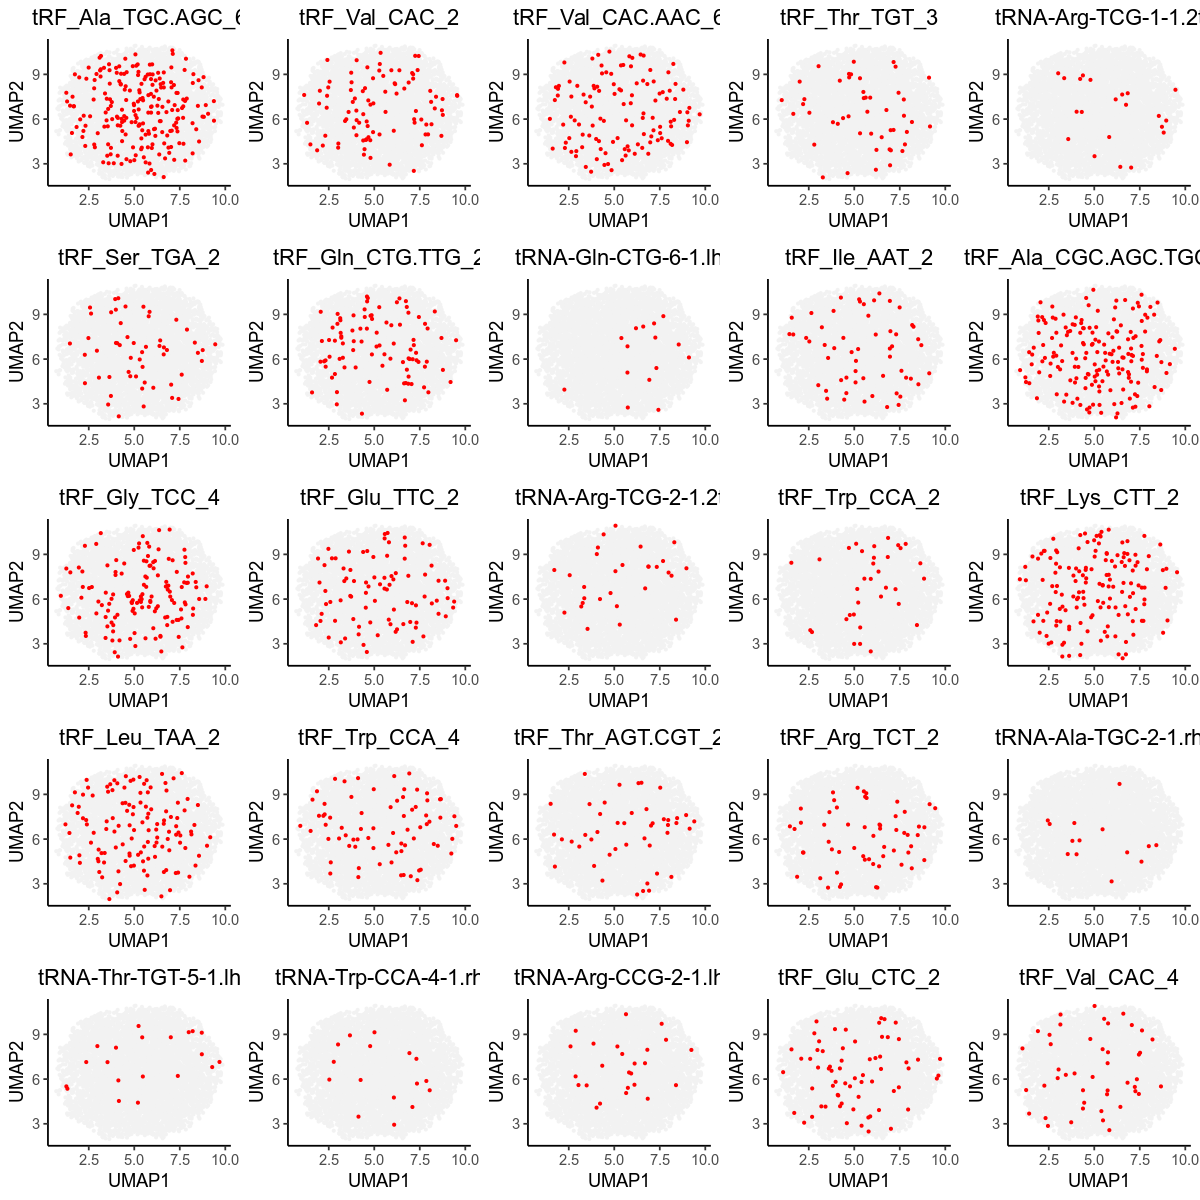

In [23]:
names(umap_list)[[11]]
umap_plts[[11]][[1]]

[1] "R1_K1_C1_T1"

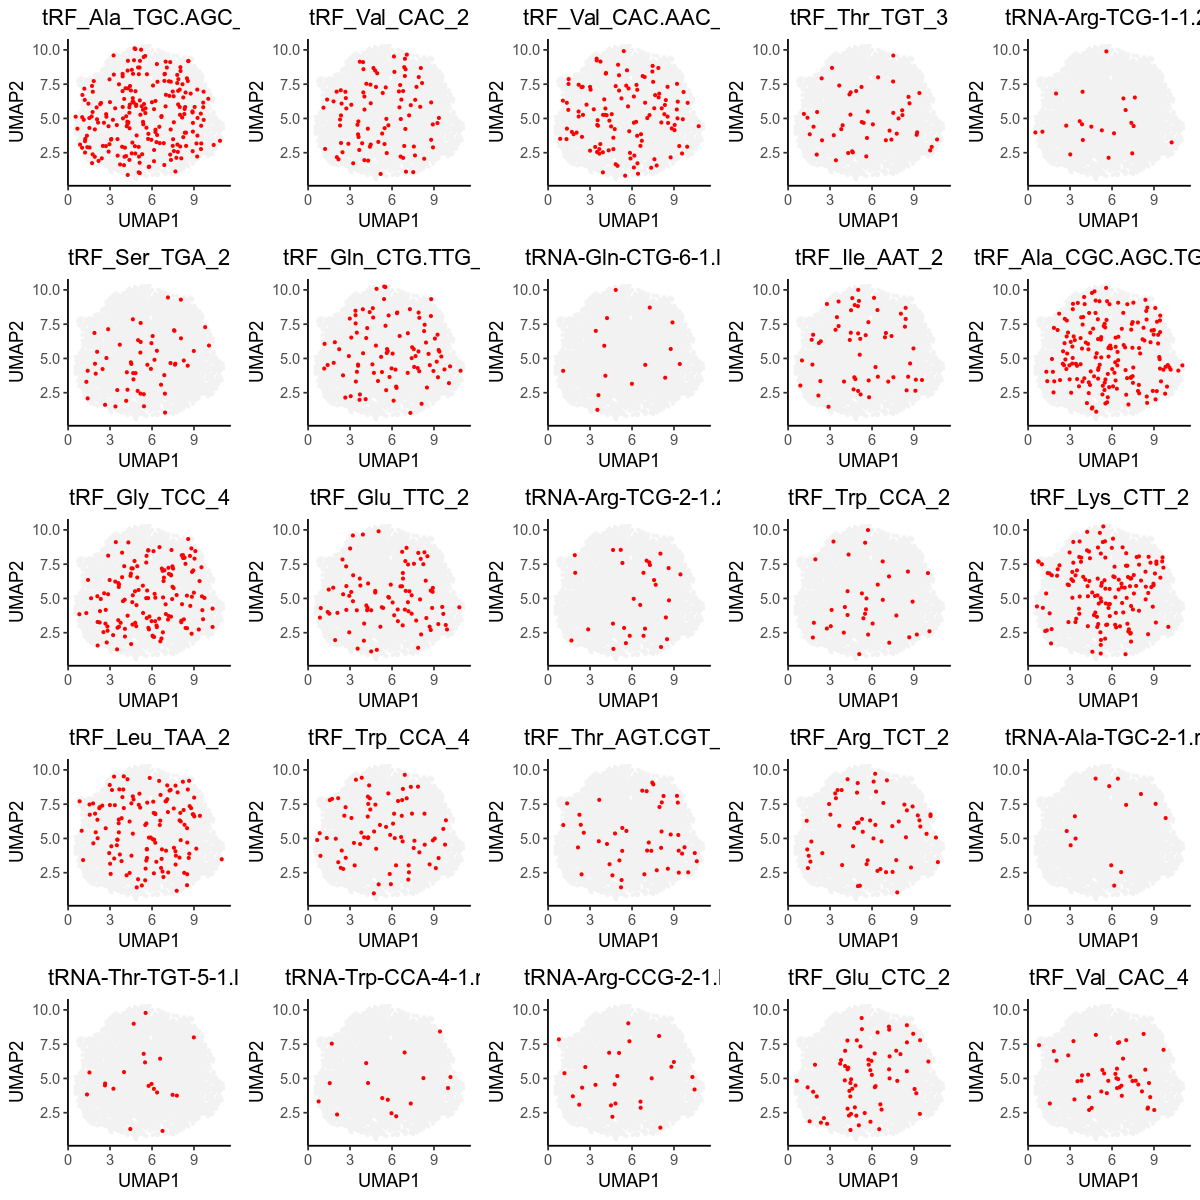

In [24]:
names(umap_list)[[12]]
umap_plts[[12]][[1]]

[1] "R1_K1_C1_T1e-05"

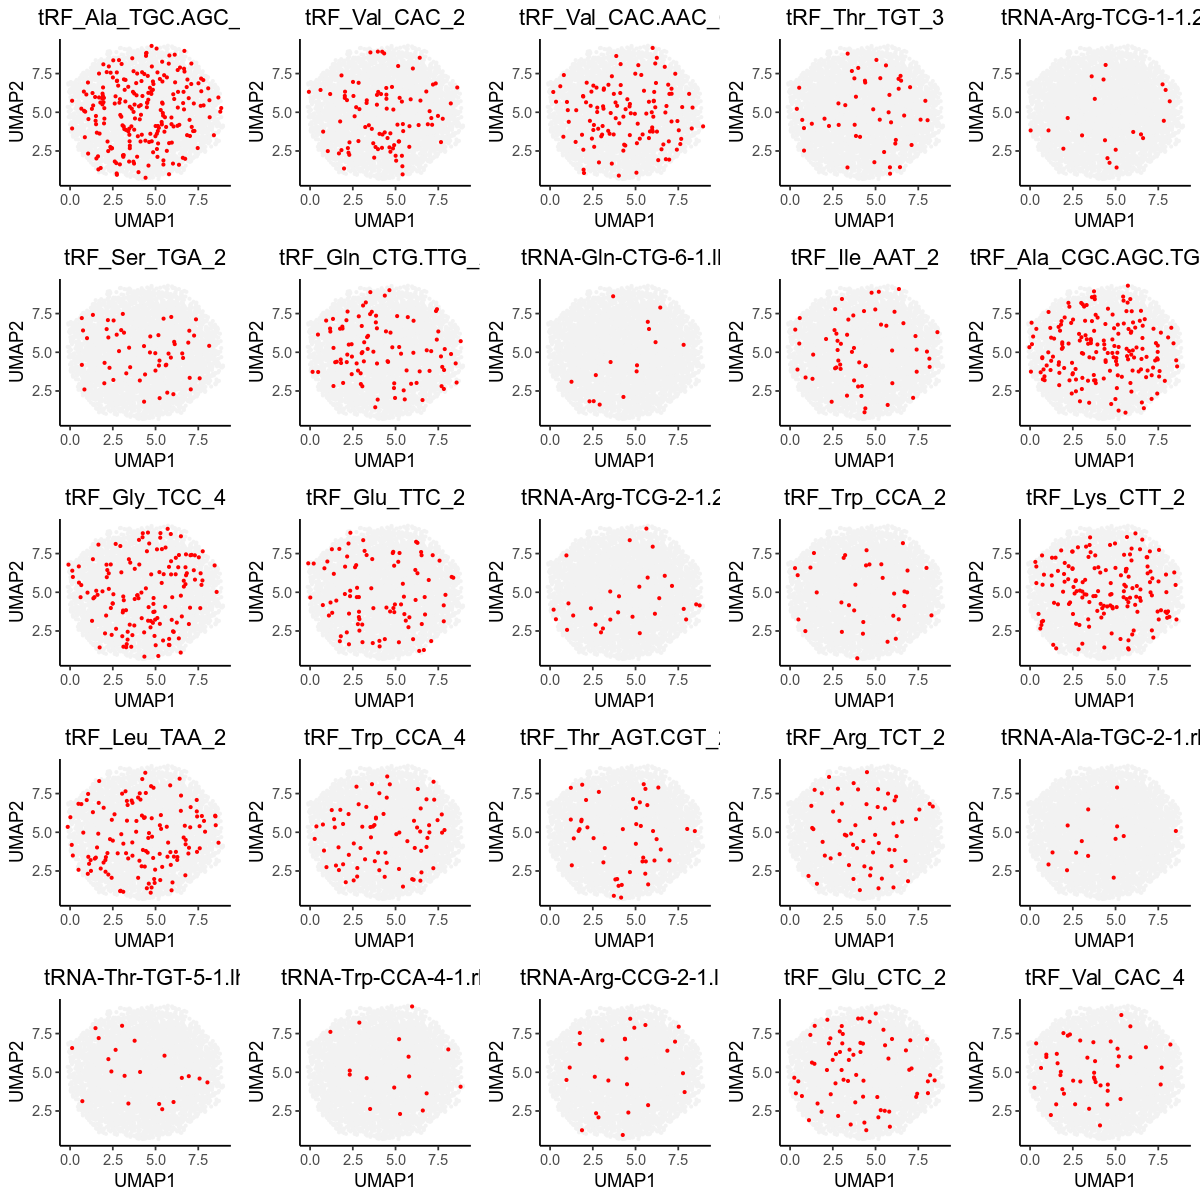

In [25]:
names(umap_list)[[13]]
umap_plts[[13]][[1]]

[1] "R1_K1_C1_T1e-10"

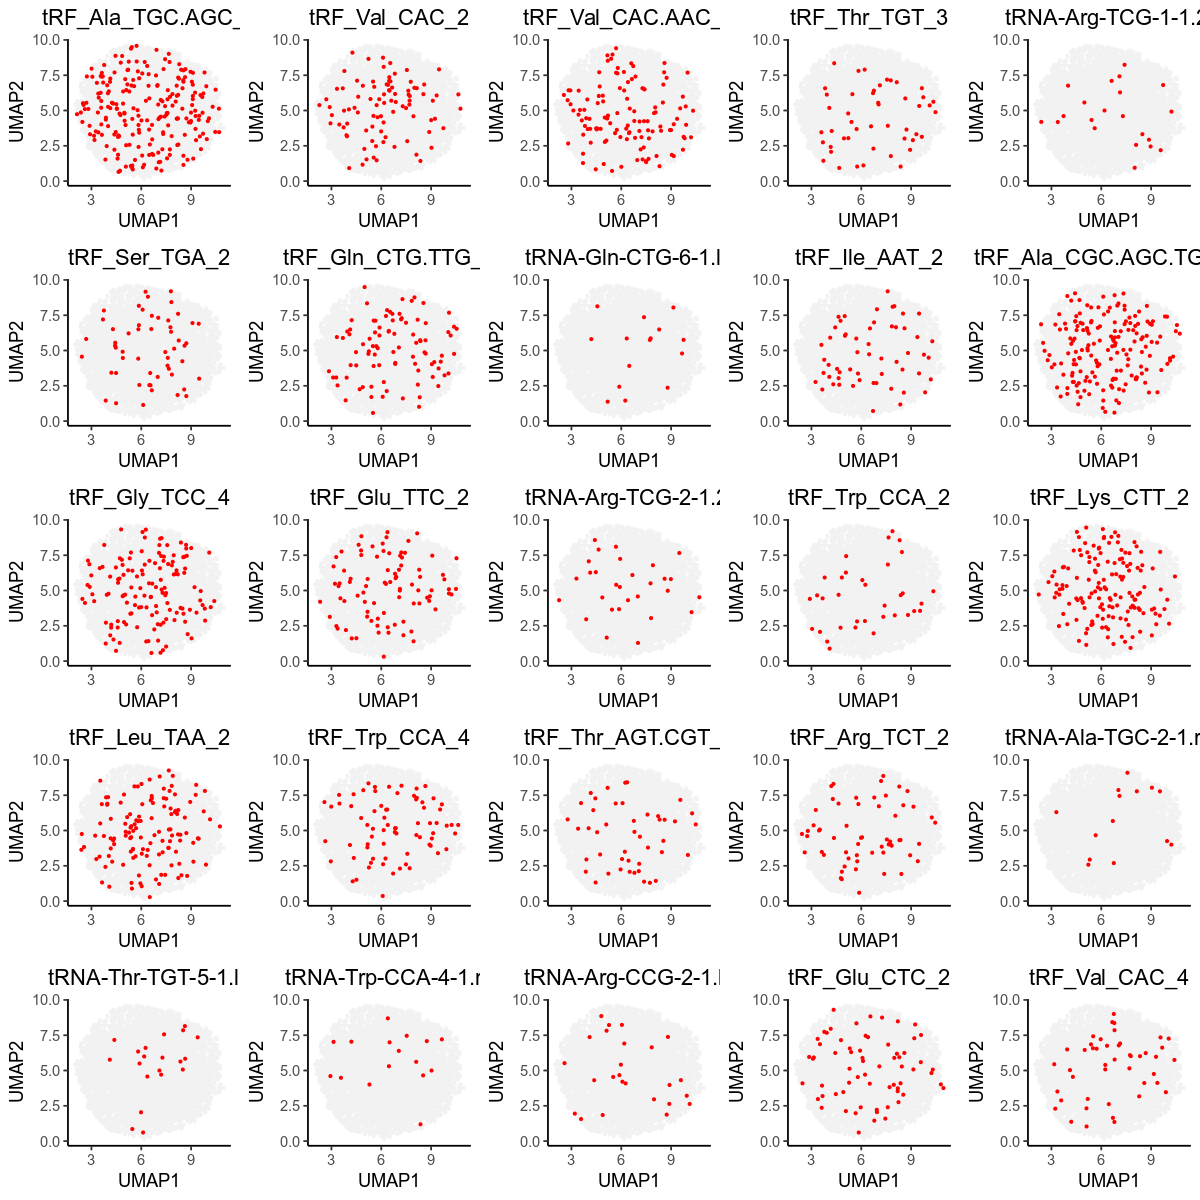

In [26]:
names(umap_list)[[14]]
umap_plts[[14]][[1]]

[1] "R1_K1_C1_T1e-15"

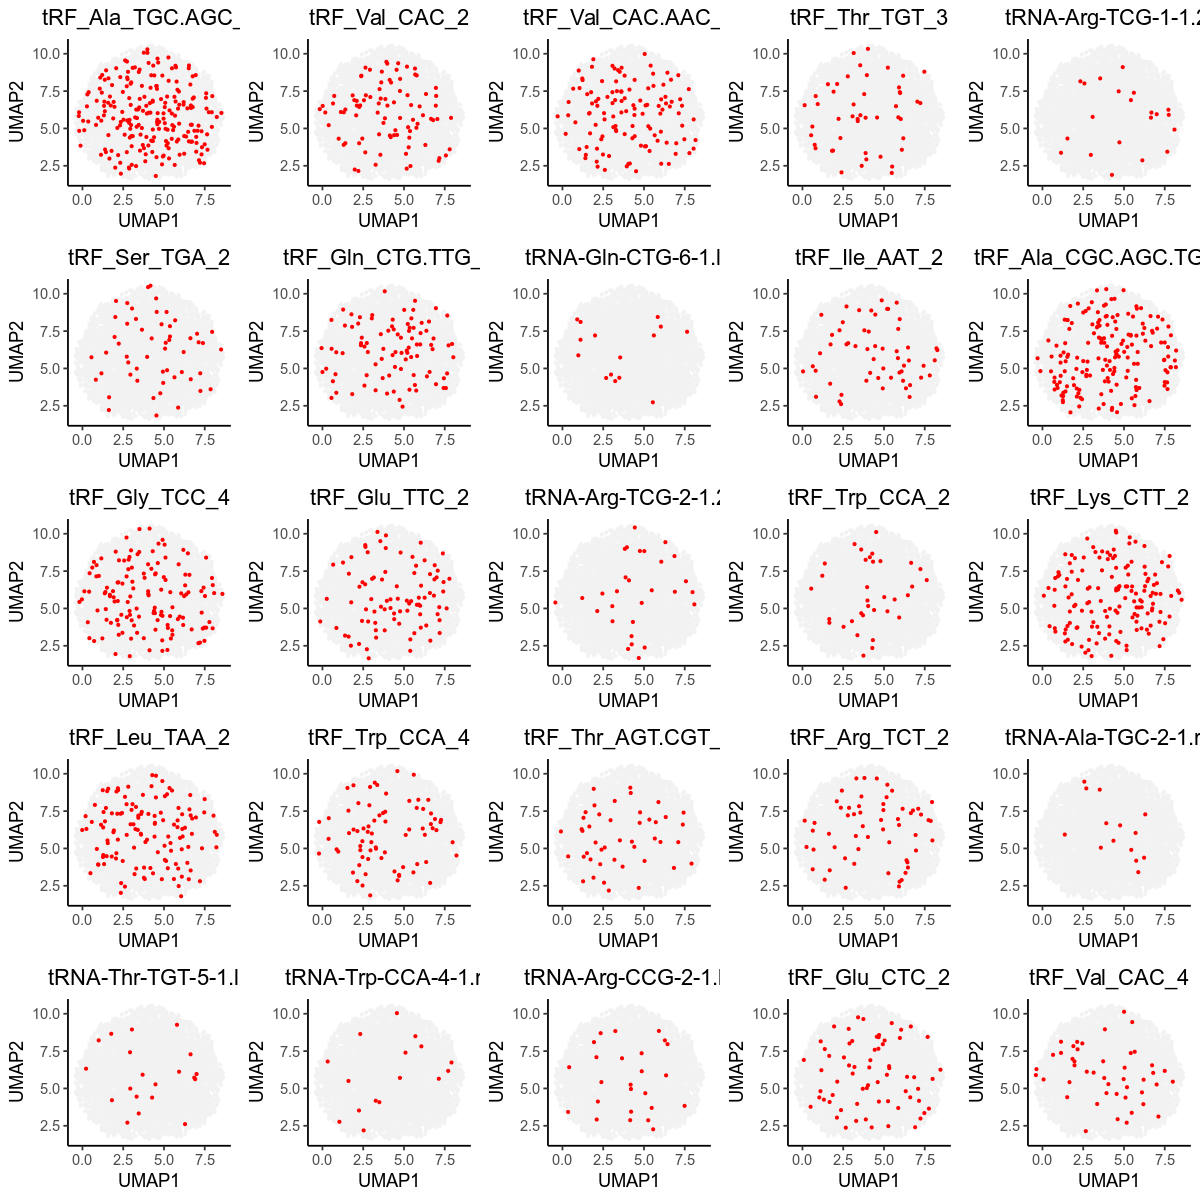

In [27]:
names(umap_list)[[15]]
umap_plts[[15]][[1]]

[1] "R1_K1_C1_T100000"

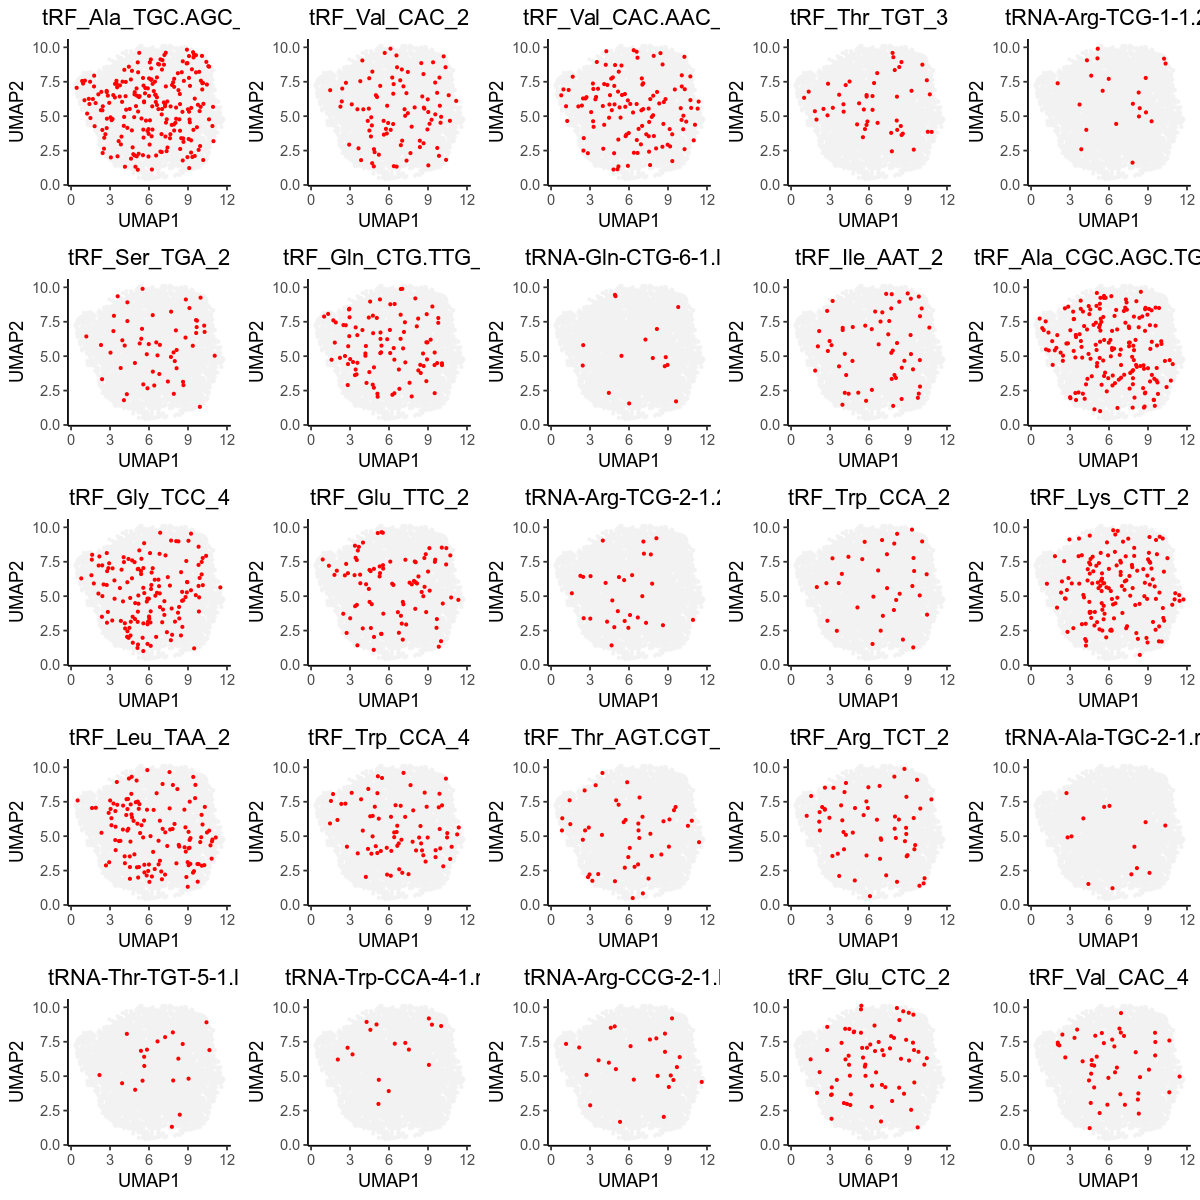

In [28]:
names(umap_list)[[16]]
umap_plts[[16]][[1]]

[1] "R1_K1_C1_T10000000000"

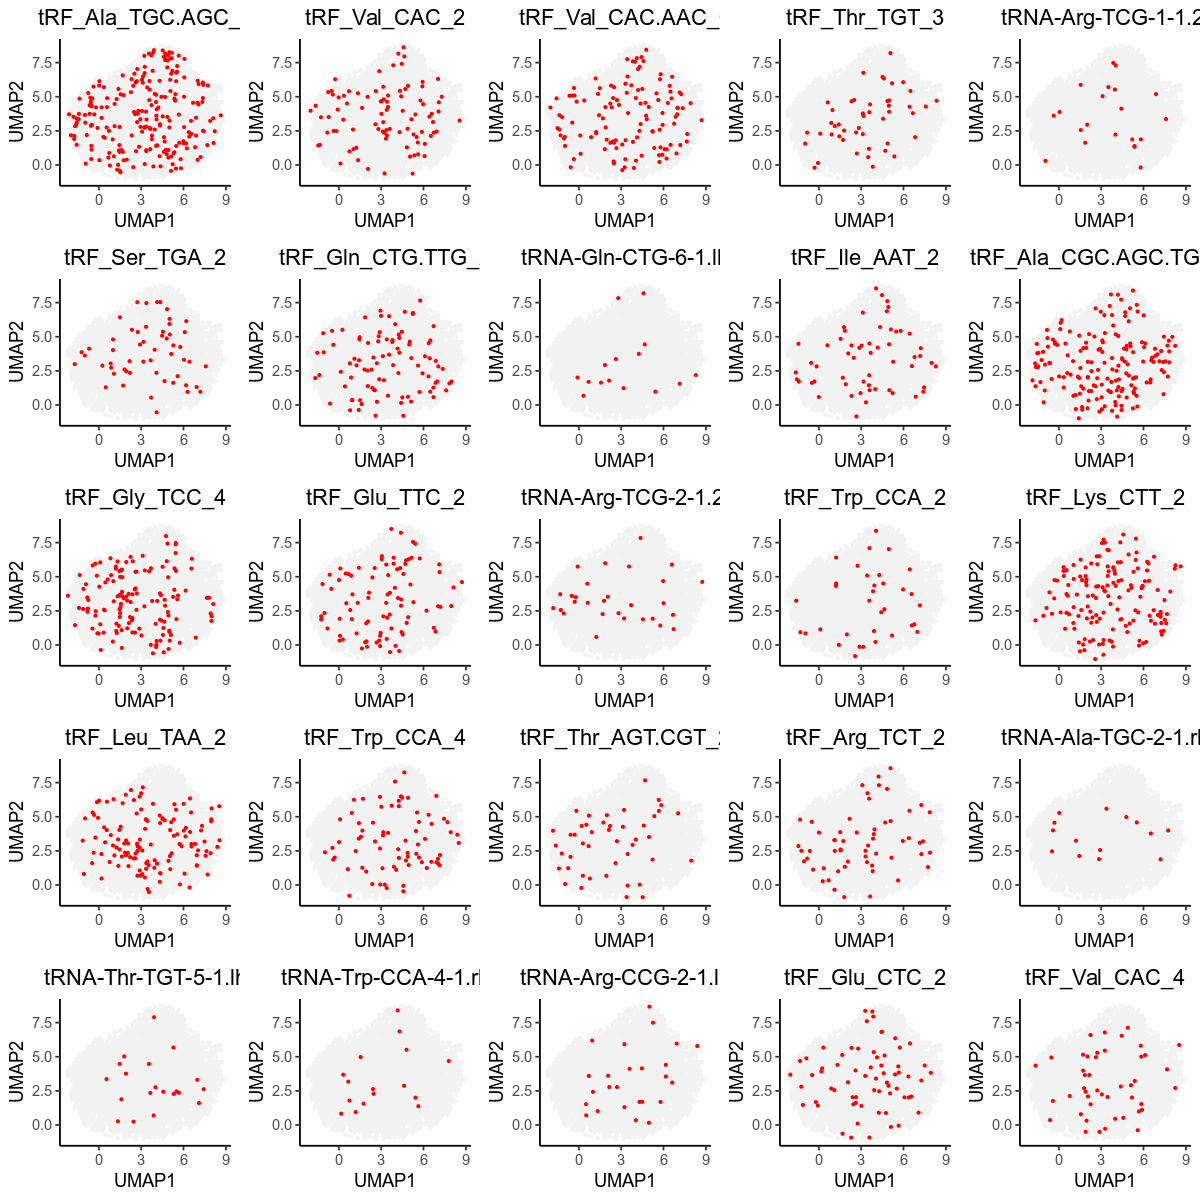

In [29]:
names(umap_list)[[17]]
umap_plts[[17]][[1]]

[1] "R1_K1_C1_T1000000000000000"

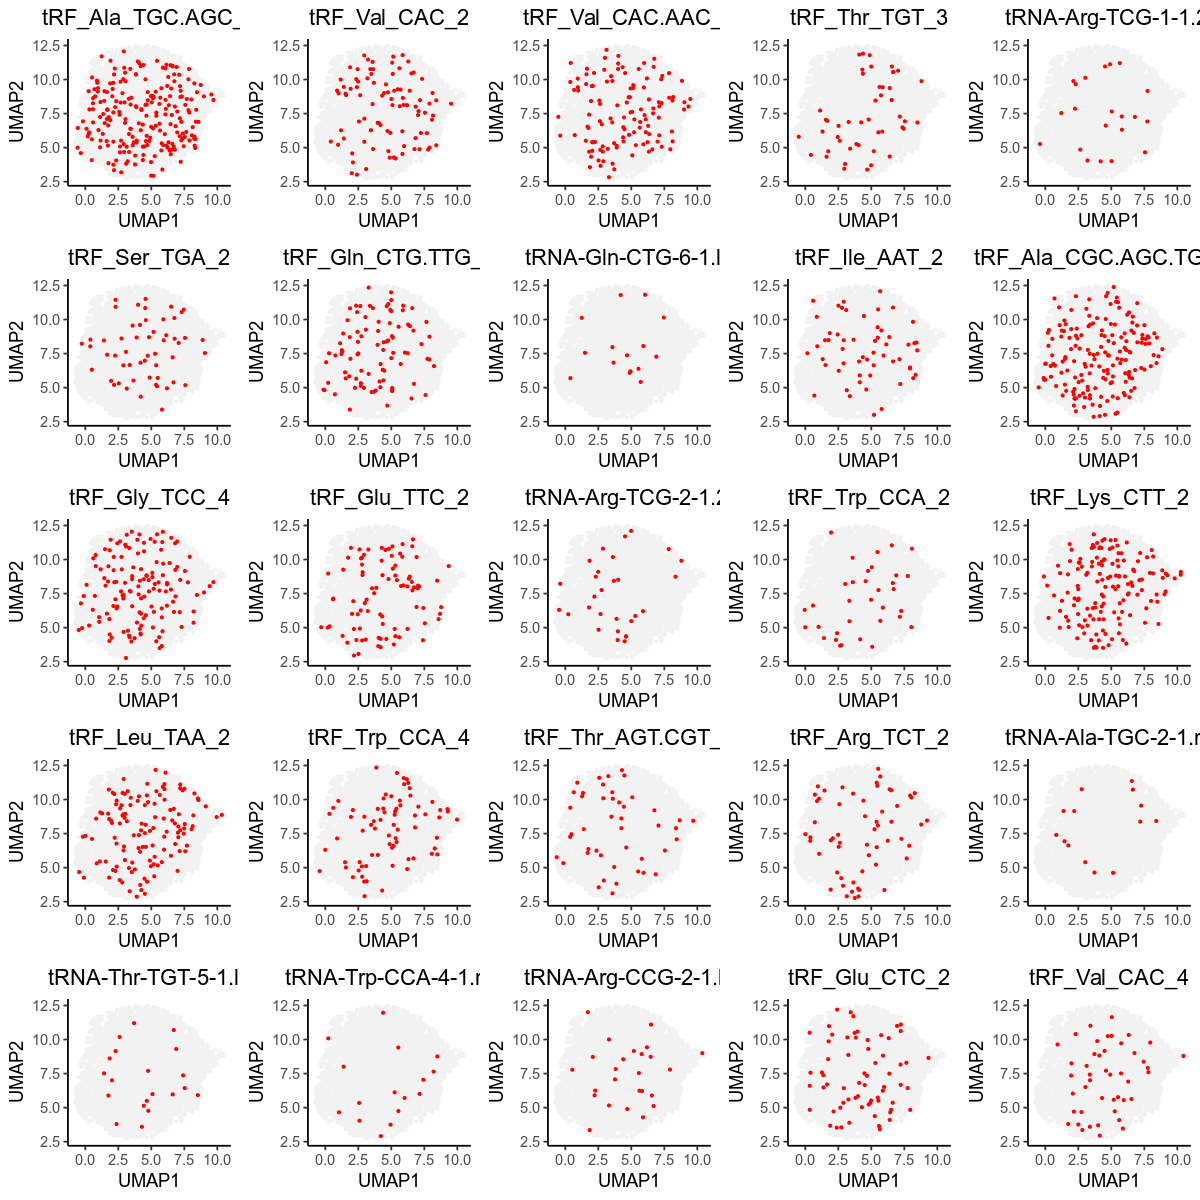

In [30]:
names(umap_list)[[18]]
umap_plts[[18]][[1]]